#  Fifa 20 Regression Model

<img src="fifa.jpg" float: right>

In [1]:
# !pip install dalex lightgbm

In [2]:
import dalex as dx 

import numpy as np
import pandas as pd
import shap 

from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from mosaicml import *
from mosaicml.constants import MLModelFlavours

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = dx.datasets.load_fifa()
data.head(10)

,nationality,overall,potential,wage_eur,value_eur,age,height_cm,weight_kg,attacking_crossing,attacking_finishing,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
short_name,,,,,,,,,,,,,,,,,,,,,
L. Messi,Argentina,94,94,565000,95500000,32,170,72,88,95,...,75,96,33,37,26,6,11,15,14,8
Cristiano Ronaldo,Portugal,93,93,405000,58500000,34,187,83,84,94,...,85,95,28,32,24,7,11,15,14,11
Neymar Jr,Brazil,92,92,290000,105500000,27,175,68,87,87,...,90,94,27,26,29,9,9,15,15,11
J. Oblak,Slovenia,91,93,125000,77500000,26,188,87,13,11,...,11,68,27,12,18,87,92,78,90,89
E. Hazard,Belgium,91,91,470000,90000000,28,175,74,81,84,...,88,91,34,27,22,11,12,6,8,8
K. De Bruyne,Belgium,91,91,370000,90000000,28,181,70,93,82,...,79,91,68,58,51,15,13,5,10,13
M. ter Stegen,Germany,90,93,250000,67500000,27,187,85,18,14,...,25,70,25,13,10,88,85,88,88,90
V. van Dijk,Netherlands,90,91,200000,78000000,27,193,92,53,52,...,62,89,91,92,85,13,10,13,11,11
L. Modric,Croatia,90,90,340000,45000000,33,172,66,86,72,...,82,92,68,76,71,13,9,7,14,9


In [5]:
X = data.drop(["nationality", "overall", "potential", "value_eur", "wage_eur"], axis = 1)
y = data['value_eur']

In [7]:
ylog = np.log(y)

import matplotlib.pyplot as plt
plt.hist(ylog, bins='auto')
plt.title("ln(value_eur)")
plt.show()

In [8]:
X_train, X_test, ylog_train, ylog_test, y_train, y_test = train_test_split(X, ylog, y, test_size=0.25, random_state=4)


In [9]:
y_train[0:5]

short_name
M. Batshuayi    16000000
M. Agu           6500000
Y. El Arabi      7000000
P. Cisse         3500000
A. Parmak        2200000
Name: value_eur, dtype: int64

In [10]:
gbm_default = GradientBoostingRegressor()

gbm_default.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
X_train[0:4]

,age,height_cm,weight_kg,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
short_name,,,,,,,,,,,,,,,,,,,,,
M. Batshuayi,25,185,88,65,81,75,63,82,78,66,...,67,81,37,26,22,9,10,16,7,15
M. Agu,26,184,77,47,41,65,73,38,64,44,...,46,60,73,75,73,14,14,9,14,14
Y. El Arabi,32,182,84,61,80,74,68,85,85,72,...,86,64,25,30,42,6,16,11,6,11
P. Cisse,34,183,73,63,79,70,72,74,73,75,...,70,74,57,19,19,8,10,12,13,12


In [12]:
@scoring_func
def score(model, request):
    payload = request.json["payload"]
    data_list = payload
    data_array = np.asarray(data_list)
    try:
        prediction = model.predict(data_array)
    except:
        prediction = model.predict(data_array.reshape(1, -1))
    return prediction.tolist()


In [13]:
# # to verify if score func works
import requests
req = requests.Request()
req.json = {"payload":X_train[0:4]}

score(gbm_default, req)

[17486393.998878445, 4700883.234152819, 7806455.846773997, 2705203.132935424]

In [14]:
Y_true = y_test

Y_pred = gbm_default.predict(X_test)

In [15]:
features = list(X_train)

In [61]:
register_model(
    gbm_default,
    score,
    "fifa_regression_temp",
    "fifa_regression",
    MLModelFlavours.sklearn,
    init_script="mkdir abc \\n cd abc \\n touch abc.txt",
    input_type="json",
)

{'created_by': 'devesh.surve@lntinfotech.com',
 'created_on': '2020-10-29T14:15:19+00:00',
 'deploymentstatus': False,
 'description': 'fifa_regression',
 'flavour': 'sklearn',
 'id': 'd6f3981f-4471-4841-b59d-2eb3e662fc86',
 'last_modified_by': 'devesh.surve@lntinfotech.com',
 'last_modified_on': '2020-10-29T14:15:19+00:00',
 'name': 'fifa_regression_temp',
 'project_id': '0d7e3c4e-8990-4847-8fa9-7483c5c87477',
 'type': 'model',
 'versions': [{'created_by': 'devesh.surve@lntinfotech.com',
   'created_on': '2020-10-29T14:15:19+00:00',
   'datasource_name': '',
   'deploy_info': None,
   'deployments': [],
   'description': None,
   'docker_image_url': 'registry.lti-aiq.in:443/mosaic-ai-logistics/mosaic-ai-serving:1.0.0-211020',
   'gpu_docker_image_url': 'registry.lti-aiq.in:443/mosaic-ai-logistics/mosaic-ai-serving:gpu-1.0.0-30092020',
   'id': '964daa9b-9553-480e-91d6-6966abc6ff49',
   'init_script': '"pip install --user absl-py==0.10.0\\n pip install --user alembic==1.4.3\\n pip inst

In [64]:
from mosaicml.expai import expai_graph

pdp, fi, se = expai_graph(
    x_train=X_train,
y_train=y_train,
model=gbm_default,
feature_names=features,
feature_ids=features[0:5],
target_names=["Value"],
_ml_model_id="0699fcc0-e197-465e-a1c0-953553827fae",
_ml_version_id="7268537d-50d2-40d3-bfb7-e53932cf3293",
model_type="regression"
)




2020-10-29 14:21:47,830 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2020-10-29 14:21:47,833 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[25/25] grid cells ████████████████████ Time elapsed: 2 seconds

2020-10-29 14:21:51,073 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2020-10-29 14:21:51,076 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[22/22] grid cells ████████████████████ Time elapsed: 2 seconds

2020-10-29 14:21:54,061 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2020-10-29 14:21:54,064 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[22/22] grid cells ████████████████████ Time elapsed: 2 seconds

2020-10-29 14:21:57,230 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2020-10-29 14:21:57,234 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[29/29] grid cells ████████████████████ Time elapsed: 3 seconds

2020-10-29 14:22:01,099 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False
2020-10-29 14:22:01,102 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[30/30] grid cells ████████████████████ Time elapsed: 3 seconds

2020-10-29 14:22:04,473 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False
2020-10-29 14:22:04,476 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


[37/37] features ████████████████████ Time elapsed: 14 seconds

2020-10-29 14:22:19,429 - skater.core.global_interpretation.tree_surrogate - INFO - post pruning applied ...
2020-10-29 14:22:19,501 - skater.core.global_interpretation.tree_surrogate - INFO - Scorer used MAE
2020-10-29 14:22:19,503 - skater.core.global_interpretation.tree_surrogate - INFO - original score using base model 1062151.0120345897
2020-10-29 14:22:19,649 - skater.core.global_interpretation.tree_surrogate - INFO - Summary: childrens of the following nodes are removed []
2020-10-29 14:22:19,652 - skater.core.global_interpretation.tree_surrogate - INFO - Done generating prediction using the surrogate, shape (3750,)
2020-10-29 14:22:19,654 - skater.core.global_interpretation.tree_surrogate - INFO - Done scoring, surrogate score 1062151.012; oracle score 1262252.299
2020-10-29 14:22:19,655 - skater.core.global_interpretation.tree_surrogate - WARNING - impurity score: 200101.287 of the surrogate model is higher than the impurity threshold: 0.01. The higher the impurity score, lowe

[22/22] grid cells ████████████████████ Time elapsed: 2 seconds

[[<Figure size 1152x720 with 1 Axes>,
 [<Figure size 1152x720 with 1 Axes>,
 [<Figure size 1152x720 with 1 Axes>,

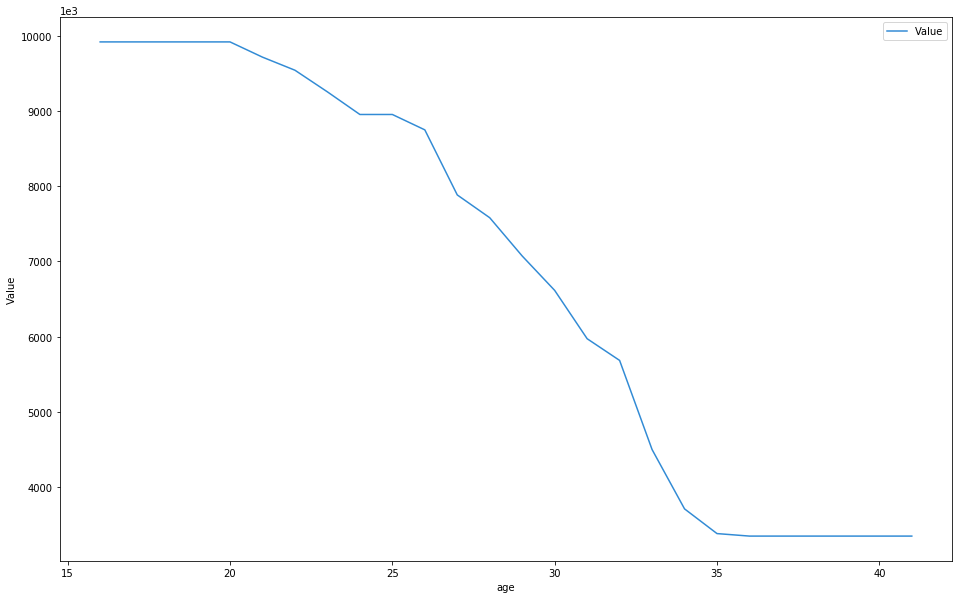

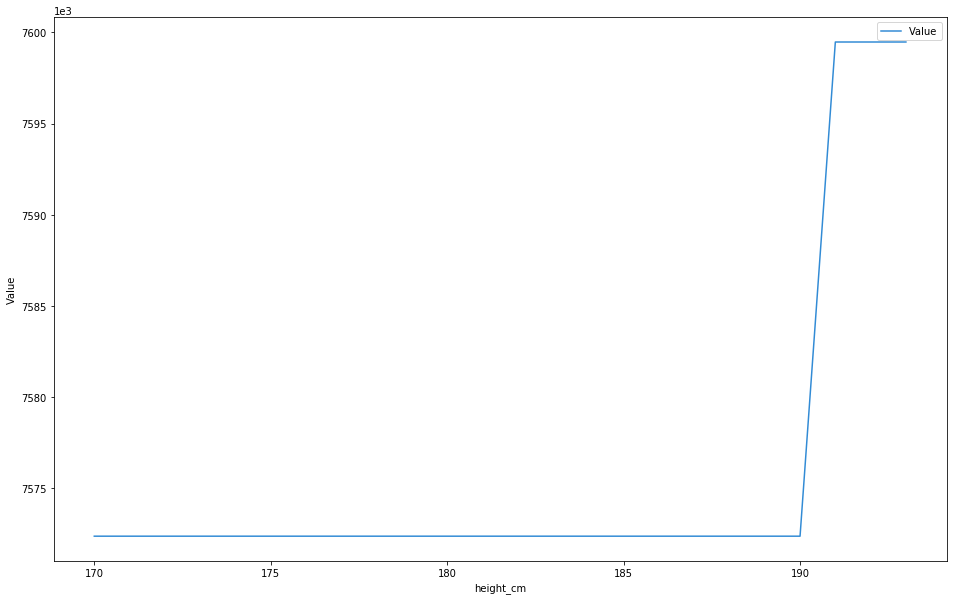

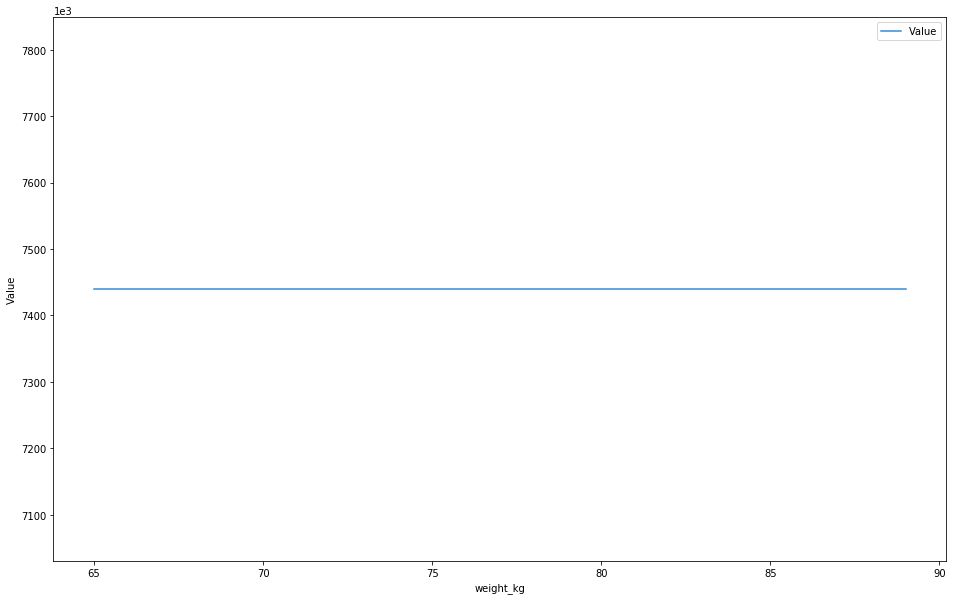

In [16]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

%matplotlib inline

interpreter = Interpretation(
            training_data=X_train, 
            training_labels=y_train, 
            feature_names=features,
            class_names=["Value"],
            log_level=300
        )
pyint_model = InMemoryModel(
                gbm_default.predict,
                examples=X_train,
                target_names=["Value"],
                feature_names=features,
                model_type="regressor",
                log_level=30,
            )
interpreter.partial_dependence.plot_partial_dependence(
                features[0:3],
                pyint_model,
                n_jobs=2,
                grid_resolution=30,
                n_samples=3000,
                progressbar=True,
            )

[37/37] features ████████████████████ Time elapsed: 14 seconds

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe35bebc0f0>)

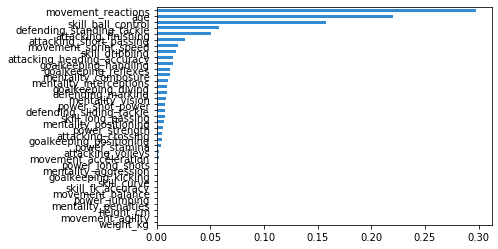

In [17]:
interpreter.feature_importance.plot_feature_importance(pyint_model, ascending=True, filter_classes=None, n_jobs=1, progressbar=True,
                   n_samples=1000000, method='model-scoring', scorer_type='default', use_scaling=False)

2020-10-29 14:48:19,703 - skater.core.global_interpretation.tree_surrogate - INFO - post pruning applied ...
2020-10-29 14:48:19,763 - skater.core.global_interpretation.tree_surrogate - INFO - Scorer used MAE
2020-10-29 14:48:19,765 - skater.core.global_interpretation.tree_surrogate - INFO - original score using base model 1679442.2952496628
2020-10-29 14:48:19,915 - skater.core.global_interpretation.tree_surrogate - INFO - Summary: childrens of the following nodes are removed []
2020-10-29 14:48:19,918 - skater.core.global_interpretation.tree_surrogate - INFO - Done generating prediction using the surrogate, shape (3750,)
2020-10-29 14:48:19,919 - skater.core.global_interpretation.tree_surrogate - INFO - Done scoring, surrogate score 1679442.295; oracle score 1262252.299


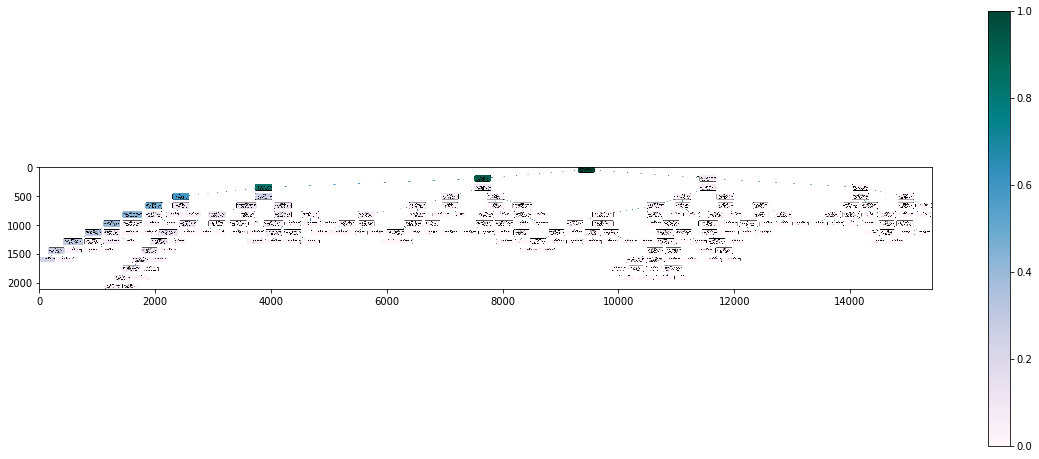

In [18]:
surrogate_tree_class_obj = interpreter.tree_surrogate(oracle=pyint_model, splitter='best', max_depth=300, min_samples_split=2, 
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
                               seed=None, max_leaf_nodes=100, min_impurity_decrease=0.0, min_impurity_split=None, 
                               class_weight='balanced', presort=True, impurity_threshold=0.01)


impurity_score = surrogate_tree_class_obj.fit(X_train, y_train, use_oracle=False, prune='post', cv=10, 
                             n_iter_search=100, scorer_type='default', n_jobs=-1, param_grid=None, 
                             impurity_threshold=0.5, verbose=False)


surrogate_tree_class_obj.plot_global_decisions(colors=None, enable_node_id=True, random_state=0, 
                                               file_name='interpretable_tree_fifa.png', show_img=True, 
                                               fig_size=(20, 8))

In [19]:
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer

lime_explainer_obj = LimeTabularExplainer(X_train.to_numpy(), mode='regression', training_labels=y_train, 
                                feature_names=features, categorical_features=None, categorical_names=None, 
                                kernel_width=None, verbose=False, class_names=["Value"], 
                                feature_selection='auto', discretize_continuous=True, 
                                discretizer='quartile')

lime_instance_obj = lime_explainer_obj.explain_instance(
    X_train.to_numpy()[0], gbm_default.predict, num_features=10, 
    num_samples=100, distance_metric='euclidean', model_regressor=None,
    labels=["Value"])


In [ ]:
lime_instance_obj.show_in_notebook()

In [82]:
# !pip install shap

In [ ]:
shap.initjs()

In [22]:
explainer = shap.TreeExplainer(gbm_default)
shap_values = explainer.shap_values(X_train)

from IPython.display import display
display(shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:]))